In [1]:
import tensorflow as tf
import tensorflow_hub as hub

import cv2
import numpy as np
import matplotlib.pyplot as plt

import PIL.Image as Image
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from jupyterthemes import jtplot
jtplot.style()

In [46]:
IMAGE_SHAPE=(224,224)

m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", 
                   input_shape=IMAGE_SHAPE+(3,)), 
    #tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Loading the Dataset from Imagenet

In [53]:
dataset_url="http://download.tensorflow.org/example_images/flower_photos.tgz"
data=tf.keras.utils.get_file('flowers_photos',origin=dataset_url,cache_dir='.',untar=True)
data

'.\\datasets\\flowers_photos'

In [55]:
import pathlib
data_dir = pathlib.Path(r"C:\Users\Prithvi Kollara\Desktop\ML\DL NEW\MobilenetV2\datasets\flower_photos")
data_dir

WindowsPath('C:/Users/Prithvi Kollara/Desktop/ML/DL NEW/MobilenetV2/datasets/flower_photos')

In [56]:
os.access(data_dir,os.F_OK)

True

In [57]:
os.listdir(data_dir)

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [58]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/Prithvi Kollara/Desktop/ML/DL NEW/MobilenetV2/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/Prithvi Kollara/Desktop/ML/DL NEW/MobilenetV2/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/Prithvi Kollara/Desktop/ML/DL NEW/MobilenetV2/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/Prithvi Kollara/Desktop/ML/DL NEW/MobilenetV2/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/Prithvi Kollara/Desktop/ML/DL NEW/MobilenetV2/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [59]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

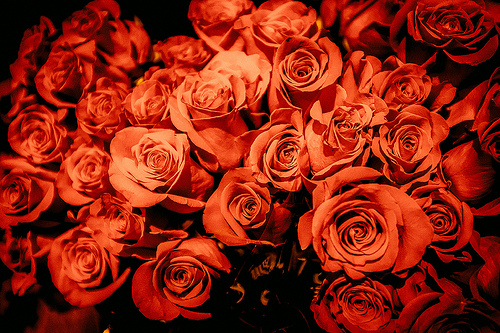

In [60]:
roses=list(data_dir.glob('roses/*'))
Image.open(str(roses[2]))

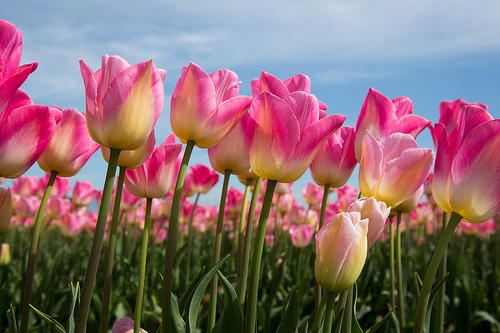

In [61]:
tulips=list(data_dir.glob('tulips/*'))
Image.open(str(tulips[3]))

In [62]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
}

In [63]:
flowers_labels_dict={
    'roses':0,
    'tulips':1,
    'dandelion':2,
    'daisy':3,
    'sunflowers':4    
}

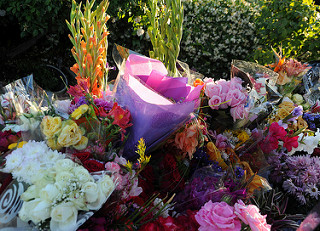

In [64]:
Image.open(flowers_images_dict['roses'][3])

In [65]:
str(flowers_images_dict['roses'][0])

'C:\\Users\\Prithvi Kollara\\Desktop\\ML\\DL NEW\\MobilenetV2\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [66]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [67]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [68]:
X,y=[],[]

for flower_name,images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img = cv2.resize(img,IMAGE_SHAPE)
        X.append(resize_img)
        y.append(flowers_labels_dict[flower_name])

In [69]:
X=np.array(X)
y=np.array(y)

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [71]:
X_train_scaled=X_train/255.0
X_test_scaled=X_test/255.0

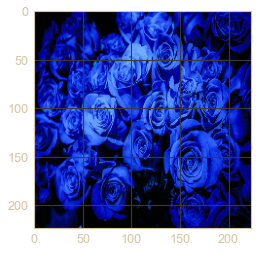

In [72]:
plt.imshow(X[2])
plt.show()

In [77]:
X[0].shape

(224, 224, 3)

In [83]:
predicted=m.predict(X[0][np.newaxis])
predicted=np.argmax(predicted,axis=1)
predicted

1/1 [==============================] - 0s 115ms/step


array([795], dtype=int64)

In [86]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained = hub.KerasLayer(
    feature_extractor_model,input_shape=(224,224,3),
    trainable=False
)

In [89]:
classes = 5
model = tf.keras.Sequential([
    pretrained,
    tf.keras.layers.Dense(classes)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [91]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
81/81 [==============================] - 103s 1s/step - loss: 0.8742 - accuracy: 0.6734
Epoch 2/5
81/81 [==============================] - 79s 981ms/step - loss: 0.4341 - accuracy: 0.8556
Epoch 3/5
81/81 [==============================] - 84s 1s/step - loss: 0.3347 - accuracy: 0.8949
Epoch 4/5
81/81 [==============================] - 80s 983ms/step - loss: 0.2775 - accuracy: 0.9179
Epoch 5/5
81/81 [==============================] - 78s 959ms/step - loss: 0.2403 - accuracy: 0.9276


In [94]:
model.evaluate(X_test_scaled,y_test)

35/35 [==============================] - 51s 999ms/step - loss: 0.3765 - accuracy: 0.8665


[0.3764861822128296, 0.8664849996566772]

In [100]:
op=model.predict(X_test_scaled[30][np.newaxis])
op=np.argmax(op)
op

1/1 [==============================] - 0s 142ms/step


1

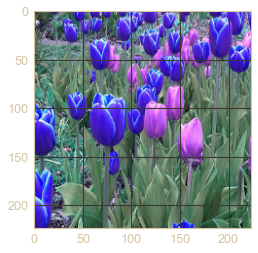

In [101]:
plt.imshow(X_test_scaled[30])